# 1. Importing, describe, value counts, cleaning, adding columns

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
csv_players = r'/kaggle/input/nba-players-info-and-headlinestats-up-to-2025/CommonPlayerInfo_ALL.csv'
csv_stats = r'/kaggle/input/nba-players-info-and-headlinestats-up-to-2025/PlayerHeadlineStats_ALL.csv'
df_players = pd.read_csv(csv_players)
df_stats = pd.read_csv(csv_stats)

In [3]:
print(df_players.info())
df_players.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135 entries, 0 to 5134
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERSON_ID           5135 non-null   int64  
 1   FIRST_NAME          5134 non-null   object 
 2   LAST_NAME           5135 non-null   object 
 3   DISPLAY_FIRST_LAST  5135 non-null   object 
 4   BIRTHDATE           5135 non-null   object 
 5   COUNTRY             5123 non-null   object 
 6   HEIGHT              5019 non-null   object 
 7   WEIGHT              5017 non-null   object 
 8   SEASON_EXP          5135 non-null   int64  
 9   POSITION            5058 non-null   object 
 10  ROSTERSTATUS        5135 non-null   object 
 11  TEAM_ID             5135 non-null   int64  
 12  TEAM_NAME           4286 non-null   object 
 13  TEAM_ABBREVIATION   4286 non-null   object 
 14  TEAM_CODE           4286 non-null   object 
 15  TEAM_CITY           4286 non-null   object 
 16  FROM_Y

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,BIRTHDATE,COUNTRY,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,FROM_YEAR,TO_YEAR,DRAFT_YEAR
count,5.135000e+03,5134,5135,5135,5135,5123,5019,5017,5135.000000,5058,5135,5.135000e+03,4286,4286,4286,4286,5126.000000,5126.000000,5135
unique,NaN,1714,3074,5095,4701,81,27,252,NaN,7,2,NaN,50,69,43,54,NaN,NaN,80
top,NaN,John,Williams,Charles Smith,1905-04-04T00:00:00,USA,6-5,210.0,NaN,Guard,Inactive,NaN,Warriors,NYK,warriors,New York,NaN,NaN,Undrafted
freq,NaN,90,83,3,4,4567,510,251,NaN,2000,4528,NaN,237,221,237,223,NaN,NaN,1378
mean,4.105997e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.167868,NaN,NaN,1.344320e+09,NaN,NaN,NaN,NaN,1991.447913,1995.842567,NaN
std,6.392423e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.533073,NaN,NaN,5.983742e+08,NaN,NaN,NaN,NaN,23.635111,24.278723,NaN
min,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1946.000000,1946.000000,NaN
25%,7.621150e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,1975.000000,1978.000000,NaN
50%,7.778900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,1994.000000,2000.000000,NaN
75%,2.032065e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,2013.000000,2018.000000,NaN


In [4]:
print(df_stats.info())
df_stats.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_ID    5001 non-null   int64  
 1   PLAYER_NAME  5001 non-null   object 
 2   TimeFrame    5001 non-null   object 
 3   PTS          5001 non-null   float64
 4   AST          5001 non-null   float64
 5   REB          4709 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 234.6+ KB
None


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PLAYER_ID,PLAYER_NAME,TimeFrame,PTS,AST,REB
count,5.001000e+03,5001,5001,5001.000000,5001.000000,4709.000000
unique,NaN,4961,6,NaN,NaN,NaN
top,NaN,Charles Smith,career,NaN,NaN,NaN
freq,NaN,3,4476,NaN,NaN,NaN
mean,3.811207e+05,NaN,NaN,6.311478,1.435693,2.941962
std,6.177664e+05,NaN,NaN,4.867030,1.397841,2.248604
min,2.000000e+00,NaN,NaN,0.000000,0.000000,0.000000
25%,7.616800e+04,NaN,NaN,2.800000,0.500000,1.300000
50%,7.770700e+04,NaN,NaN,5.100000,1.000000,2.400000
75%,2.028140e+05,NaN,NaN,8.500000,1.900000,3.900000


In [5]:
for col in df_players.columns:
    print(df_players[col].value_counts())

PERSON_ID
1630700    1
1629680    1
204002     1
1628369    1
78294      1
          ..
203081     1
77388      1
202732     1
1630604    1
1498       1
Name: count, Length: 5135, dtype: int64
FIRST_NAME
John       90
Bob        79
Jim        62
Mike       61
Chris      58
           ..
Devyn       1
Pace        1
Nico        1
Terance     1
Dain        1
Name: count, Length: 1714, dtype: int64
LAST_NAME
Williams     83
Johnson      76
Jones        62
Smith        59
Brown        42
             ..
Nimphius      1
Gattison      1
Nixon         1
Nnaji         1
Dandridge     1
Name: count, Length: 3074, dtype: int64
DISPLAY_FIRST_LAST
Charles Smith         3
George Johnson        3
Jack Turner           2
Chris Johnson         2
Charles Jones         2
                     ..
Kenneth Lofton Jr.    1
Zach Lofton           1
Don Lofgran           1
Kevin Loder           1
Antonio Daniels       1
Name: count, Length: 5095, dtype: int64
BIRTHDATE
1905-04-04T00:00:00    4
1998-06-29T00:00:0

In [6]:
for col in df_stats.columns:
    print(df_stats[col].value_counts())

PLAYER_ID
1630700    1
2657       1
1628369    1
78294      1
1630256    1
          ..
202732     1
1630604    1
77387      1
77386      1
1498       1
Name: count, Length: 5001, dtype: int64
PLAYER_NAME
Charles Smith       3
George Johnson      3
Mike James          2
Johnny Davis        2
Chris Johnson       2
                   ..
Kevin Loder         1
Ian Lockhart        1
Darrell Lockhart    1
Robert Lock         1
Antonio Daniels     1
Name: count, Length: 4961, dtype: int64
TimeFrame
career     4476
2024-25     504
2023-24      15
2022-23       3
2021-22       2
2017-18       1
Name: count, dtype: int64
PTS
2.0     98
0.0     93
1.0     76
1.8     69
2.8     69
        ..
23.7     1
23.5     1
23.3     1
23.8     1
24.5     1
Name: count, Length: 257, dtype: int64
AST
0.5     298
0.3     290
0.6     261
0.7     260
0.8     250
       ... 
11.2      1
8.3       1
8.5       1
7.7       1
7.5       1
Name: count, Length: 93, dtype: int64
REB
1.0     186
1.5     141
1.3     135
1.4

We want 5 positions (not 7)

In [7]:
df_players['POSITION'].replace(to_replace='Center-Forward',value='Forward-Center',inplace=True)
df_players['POSITION'].replace(to_replace='Forward-Guard',value='Guard-Forward',inplace=True)

/tmp/ipykernel_13/648596891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_players['POSITION'].replace(to_replace='Center-Forward',value='Forward-Center',inplace=True)
/tmp/ipykernel_13/648596891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Keeping only certain columns + cleaning

In [8]:
col_players = ['PERSON_ID', 'FIRST_NAME', 'LAST_NAME','COUNTRY', 'HEIGHT', 'WEIGHT', 'POSITION','ROSTERSTATUS', 'FROM_YEAR','TO_YEAR','SEASON_EXP']
df_players = df_players[col_players]
df_players.dropna(inplace=True,ignore_index=True)

In [9]:
df_players.head(3)

,PERSON_ID,FIRST_NAME,LAST_NAME,COUNTRY,HEIGHT,WEIGHT,POSITION,ROSTERSTATUS,FROM_YEAR,TO_YEAR,SEASON_EXP
0,1630700,Dyson,Daniels,Australia,6-7,199,Guard,Active,2021.0,2025.0,3
1,1380,Lloyd,Daniels,USA,6-7,205,Guard,Inactive,1992.0,1997.0,5
2,2605,Marquis,Daniels,USA,6-6,200,Forward,Inactive,2003.0,2012.0,11


## Conversion Height to cm / Weight to kg

In [10]:

x = df_players['HEIGHT'].str.split('-')
h = []
for i in range(len(x)):
    h.append( round(12*2.54*int(x[i][0]) + 2.54*int(x[i][1]) ) )
df_players['height_cm'] = pd.DataFrame(h)


df_players['WEIGHT'] = df_players['WEIGHT'].astype('float64')
df_players['weight_kg'] = round( df_players['WEIGHT'] * 0.454 )

Add column "decade" 

Players starting between 1990 and 1999 : decade = 1990

In [11]:
df_players['decade'] = df_players['FROM_YEAR'] - df_players['FROM_YEAR']%10

In [12]:
df_players.head(3)

,PERSON_ID,FIRST_NAME,LAST_NAME,COUNTRY,HEIGHT,WEIGHT,POSITION,ROSTERSTATUS,FROM_YEAR,TO_YEAR,SEASON_EXP,height_cm,weight_kg,decade
0,1630700,Dyson,Daniels,Australia,6-7,199.0,Guard,Active,2021.0,2025.0,3,201,90.0,2020.0
1,1380,Lloyd,Daniels,USA,6-7,205.0,Guard,Inactive,1992.0,1997.0,5,201,93.0,1990.0
2,2605,Marquis,Daniels,USA,6-6,200.0,Forward,Inactive,2003.0,2012.0,11,198,91.0,2000.0


# 2. Height and Weight analysis

## 2.1 Histplots

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='height_cm', ylabel='Count'>

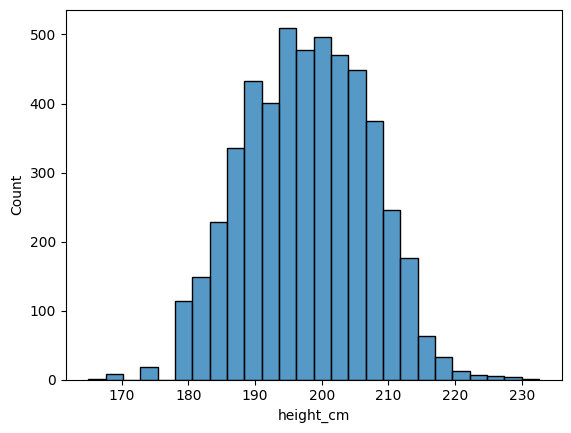

In [13]:
import seaborn as sns
sns.histplot(df_players['height_cm'],binwidth=2.6,)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight_kg', ylabel='Count'>

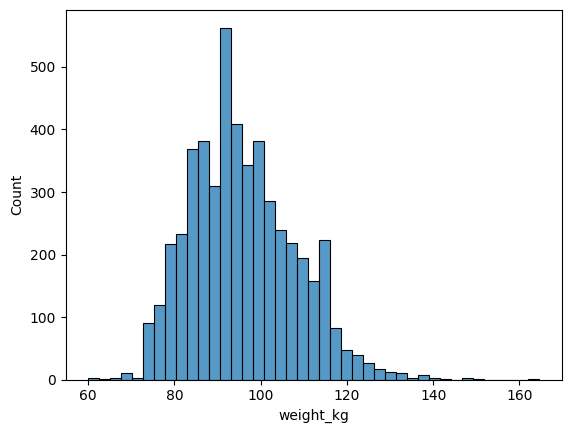

In [14]:
sns.histplot(df_players['weight_kg'],binwidth=2.55,)

## 2.2 Normally distributed ?

((array([-3.63615155, -3.40086016, -3.27118083, ...,  3.27118083,
          3.40086016,  3.63615155]),
  array([ 60.,  60.,  62., ..., 148., 150., 163.])),
 (11.989141169908983, 95.85745657815932, 0.9906736497013792))

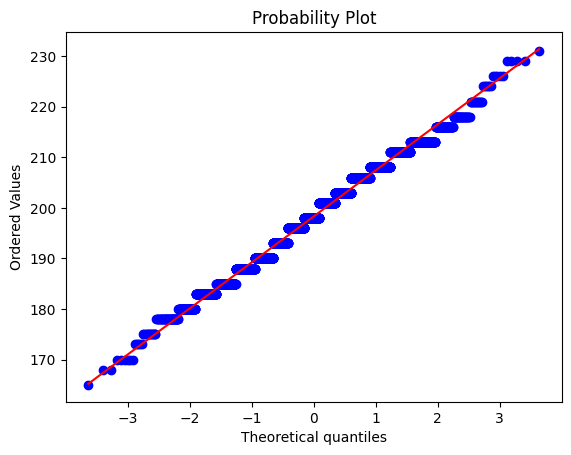

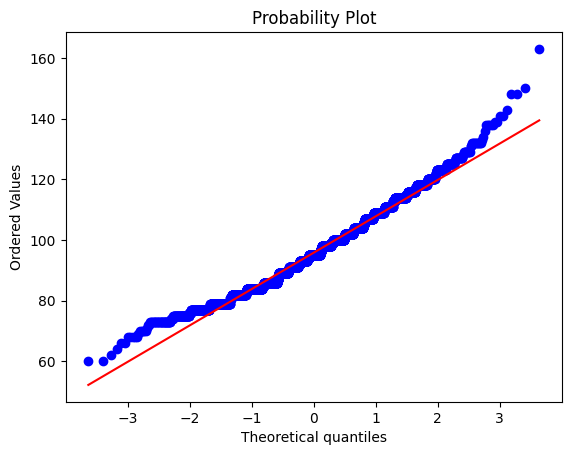

In [15]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure()
stats.probplot(df_players['height_cm'], plot=plt,)
plt.figure()
stats.probplot(df_players['weight_kg'], plot=plt,)

Height follows more or less but weight deviates for very light or very heavy players

In [16]:
print(f"Skewness: {stats.skew(df_players['weight_kg'])}  {stats.skew(df_players['height_cm'])}")
print(f"Excess kurtosis: {stats.kurtosis(df_players['weight_kg'])}  {stats.kurtosis(df_players['height_cm'])}")

Skewness: 0.4859735058018216  -0.07633348334875369
Excess kurtosis: 0.24364209817958304  -0.32181816025747567


Indeed the weight distribution is a little bit asymmetrical (skewness) and sharper (more peaked). Indeed there are more outliars than in a normal distribution. Height is symmetrical but has a flatter peak

## 2.3 Correlations

            height_cm  weight_kg  SEASON_EXP    decade
height_cm    1.000000   0.809448    0.144242  0.243680
weight_kg    0.809448   1.000000    0.193983  0.295439
SEASON_EXP   0.144242   0.193983    1.000000  0.048583
decade       0.243680   0.295439    0.048583  1.000000


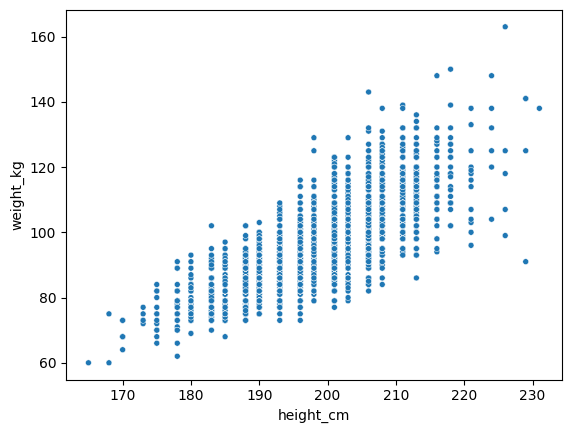

In [17]:
sns.scatterplot(data=df_players,x='height_cm', y='weight_kg',size=.1,legend=False)
c = ['height_cm','weight_kg','SEASON_EXP','decade']
print(df_players[c].corr())

Height is obviously strongly correlated with weight. There is also a slight positive correlation between the size of the player and the moment he enters the league (decade).

## 2.4 Boxplots by positions

<Axes: xlabel='POSITION', ylabel='height_cm'>

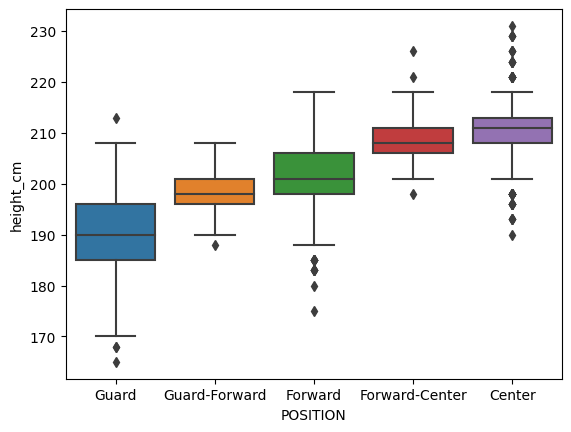

In [18]:
x_order = df_players.groupby(['POSITION'])['height_cm'].agg('median').sort_values(ascending=True).index
sns.boxplot(data=df_players, y="height_cm", x="POSITION",order=x_order)

<Axes: xlabel='POSITION', ylabel='weight_kg'>

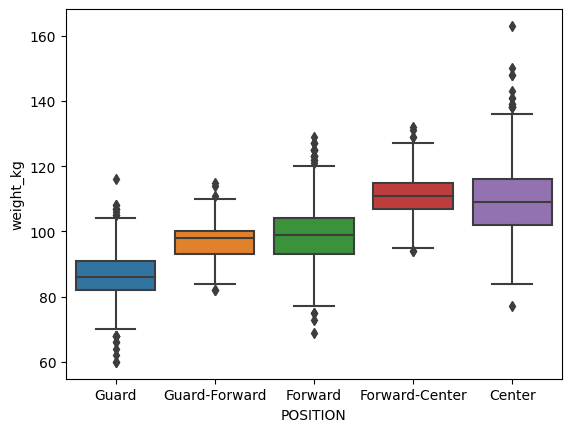

In [19]:
sns.boxplot(data=df_players, y="weight_kg", x="POSITION",order=x_order,)

In [20]:
df_players.groupby(['POSITION'])[['height_cm','weight_kg']].mean().sort_values(by='height_cm',ascending=True)

,height_cm,weight_kg
POSITION,,
Guard,190.147624,86.235086
Guard-Forward,198.916031,96.942748
Forward,201.252855,98.789560
Forward-Center,208.735294,111.403361
Center,210.161850,109.812139


Surprisingly, forward-center are a bit heavier than pure centers ?!

## 2.5 Average height and weight over decades by positions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='decade', ylabel='height_cm'>

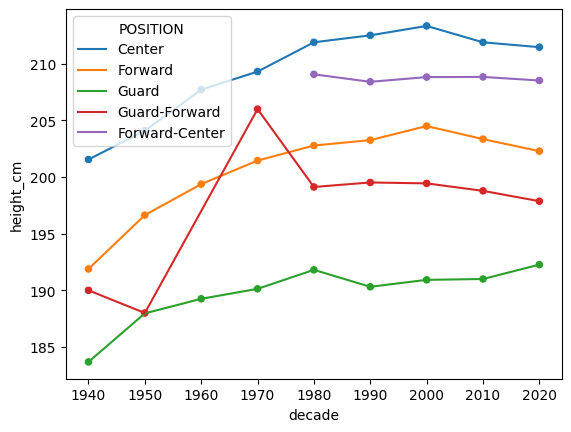

In [21]:
df2 = pd.DataFrame(df_players.groupby(['decade','POSITION'])['height_cm'].mean() )
sns.lineplot(data=df2,x='decade',y='height_cm',hue='POSITION',sizes=5)
sns.scatterplot(data=df2,x='decade',y='height_cm',hue='POSITION',sizes=5,legend=False)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='decade', ylabel='weight_kg'>

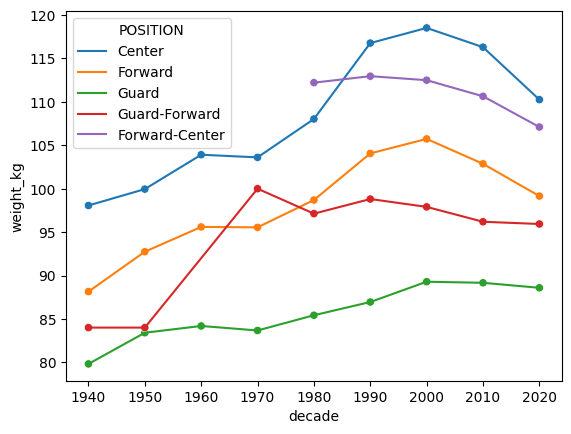

In [22]:
df3 = pd.DataFrame(df_players.groupby(['decade','POSITION'])['weight_kg'].mean())
sns.lineplot(data=df3,x='decade',y='weight_kg',hue='POSITION',sizes=5)
sns.scatterplot(data=df3,x='decade',y='weight_kg',hue='POSITION',sizes=5,legend=False)

Values for Guard-Forward between 1940 and 1970 are not accurate because there is no data ! Let's check :

In [23]:
df_players[(df_players['POSITION'] == 'Guard-Forward') & (df_players['decade'] < 1980)]

,PERSON_ID,FIRST_NAME,LAST_NAME,COUNTRY,HEIGHT,WEIGHT,POSITION,ROSTERSTATUS,FROM_YEAR,TO_YEAR,SEASON_EXP,height_cm,weight_kg,decade
1275,77142,Magic,Johnson,USA,6-9,220.0,Guard-Forward,Inactive,1979.0,1995.0,13,206,100.0,1970.0
1484,77287,Bob,Knight,USA,6-2,185.0,Guard-Forward,Inactive,1954.0,1954.0,1,188,84.0,1950.0
3552,78401,Butch,Van Breda Kolff,USA,6-3,185.0,Guard-Forward,Inactive,1946.0,1949.0,4,190,84.0,1940.0


There is only 3 players, whose one of them is Magic Johnson ... an outliar 6-9 100kg guard-forward who has started in 1979 (decade 1970)

Now we understand why forward-centers were heavier than centers : the forward-center position started in the 80's. From the 80's centers are indeed heavier than forward-centers !

We can also notice a decrease in forward --> centers weight from the 2000's while the height seems to stabilize (tall guy maybe try to limitate their bodyweight to prevent injuries ...)

# 3. Seasons experience for non active players

min : 0 , max : 23 , avg : 5.2939977349943375 , median : 3.0, variance : 20.783504970543337


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


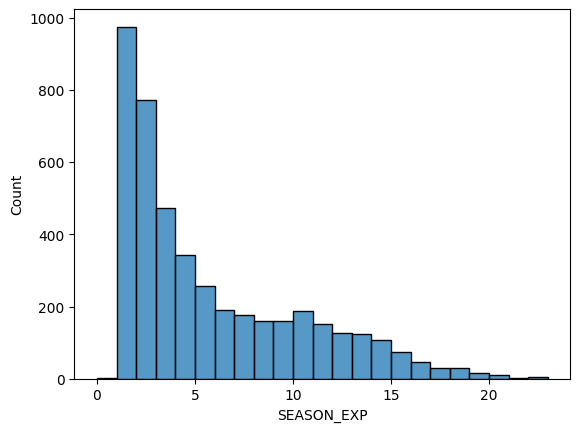

In [24]:
df_inactive = df_players[df_players['ROSTERSTATUS'] == 'Inactive']

sns.histplot(data=df_inactive, x='SEASON_EXP', binwidth=1)
#sns.histplot(np.random.geometric(p=0.2, size=5000), binwidth=1, color='white',)
print(f"min : {min(df_inactive['SEASON_EXP'])} , max : {max(df_inactive['SEASON_EXP'])} , "
      f"avg : {df_inactive['SEASON_EXP'].mean()} , median : {df_inactive['SEASON_EXP'].median()}, "
      f"variance : {df_inactive['SEASON_EXP'].std()**2}")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

decade
1940.0    2.563910
1950.0    3.706093
1960.0    5.320635
1970.0    5.122378
1980.0    5.981481
1990.0    6.837795
2000.0    7.262595
2010.0    4.561080
2020.0    2.519231
Name: SEASON_EXP, dtype: float64


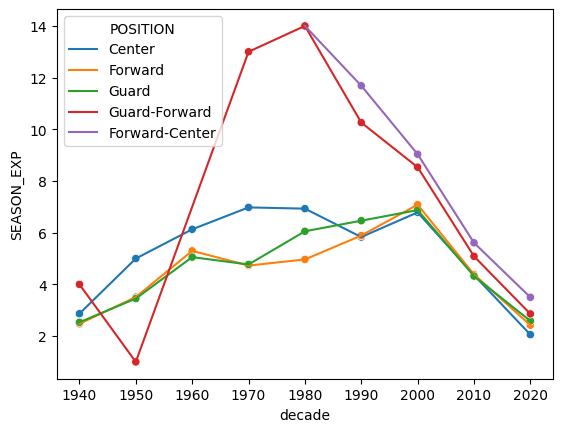

In [25]:
df4 = pd.DataFrame(df_inactive.groupby(['decade','POSITION'])['SEASON_EXP'].mean())
sns.lineplot(data=df4,x='decade',y='SEASON_EXP',hue='POSITION',sizes=5)
sns.scatterplot(data=df4,x='decade',y='SEASON_EXP',hue='POSITION',sizes=5,legend=False)

print(df_inactive.groupby('decade')['SEASON_EXP'].mean())

The number of seasons has an arch shape (for guards, forwards, centers). It has increased to an average of 6/7 seasons (max) and has dramatically fell down from the 2000's (average of 2/3 seasons exp.). The NBA is becoming more and more competitive.

# 4. Joining Players Info with their HeadStats

In [26]:
df_join = df_players.set_index('PERSON_ID').join(df_stats.set_index('PLAYER_ID'),how='left')
df_join.dropna(inplace=True)
df_join.reset_index(inplace=True)

In [27]:
df_join

,PERSON_ID,FIRST_NAME,LAST_NAME,COUNTRY,HEIGHT,WEIGHT,POSITION,ROSTERSTATUS,FROM_YEAR,TO_YEAR,SEASON_EXP,height_cm,weight_kg,decade,PLAYER_NAME,TimeFrame,PTS,AST,REB
0,1630700,Dyson,Daniels,Australia,6-7,199.0,Guard,Active,2021.0,2025.0,3,201,90.0,2020.0,Dyson Daniels,2024-25,14.1,4.4,5.9
1,1380,Lloyd,Daniels,USA,6-7,205.0,Guard,Inactive,1992.0,1997.0,5,201,93.0,1990.0,Lloyd Daniels,career,7.1,1.6,2.2
2,2605,Marquis,Daniels,USA,6-6,200.0,Forward,Inactive,2003.0,2012.0,11,198,91.0,2000.0,Marquis Daniels,career,7.9,1.8,2.8
3,76502,Mel,Daniels,USA,6-9,220.0,Center,Inactive,1976.0,1976.0,1,206,100.0,1970.0,Mel Daniels,career,3.5,0.5,3.1
4,203584,Troy,Daniels,USA,6-4,200.0,Guard,Inactive,2013.0,2019.0,8,193,91.0,2010.0,Troy Daniels,career,6.6,0.5,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,2223,Samuel,Dalembert,Haiti,6-11,255.0,Center,Inactive,2001.0,2014.0,14,211,116.0,2000.0,Samuel Dalembert,career,7.7,0.5,7.8
4614,956,Erick,Dampier,USA,6-11,265.0,Center,Inactive,1996.0,2011.0,17,211,120.0,1990.0,Erick Dampier,career,7.4,0.8,7.1
4615,76499,Lou,Dampier,USA,6-0,170.0,Guard,Inactive,1976.0,1978.0,3,183,77.0,1970.0,Lou Dampier,career,6.7,2.8,1.1
4616,76500,Bob,Dandridge,USA,6-6,195.0,Forward,Inactive,1969.0,1981.0,13,198,89.0,1960.0,Bob Dandridge,career,18.5,3.4,6.8


## 4.1 Histplots PTS/AST/REB for non active players

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PTS', ylabel='Count'>

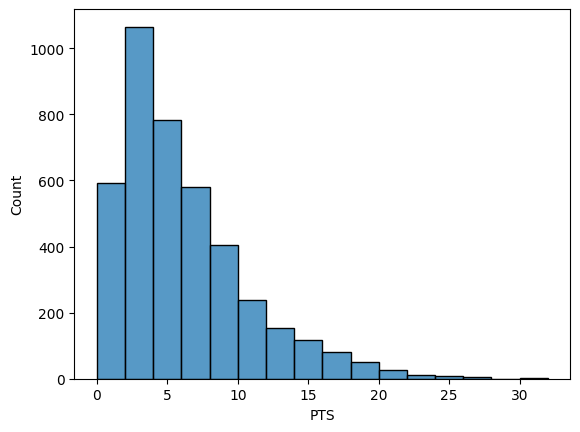

In [28]:
sns.histplot(data = df_join[df_join['ROSTERSTATUS'] == 'Inactive'], x='PTS',binwidth=2  )

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AST', ylabel='Count'>

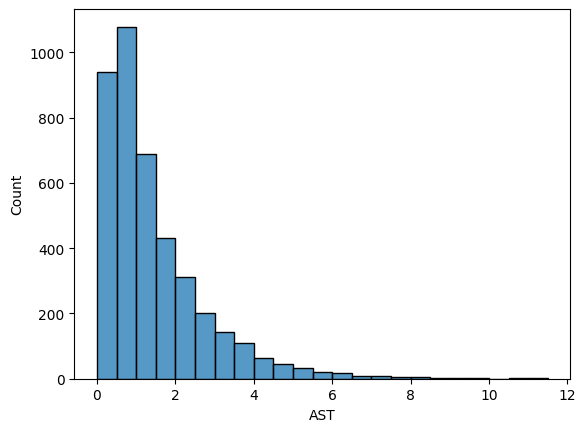

In [29]:
sns.histplot(data = df_join[df_join['ROSTERSTATUS'] == 'Inactive'], x='AST',binwidth=0.5  )

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='REB', ylabel='Count'>

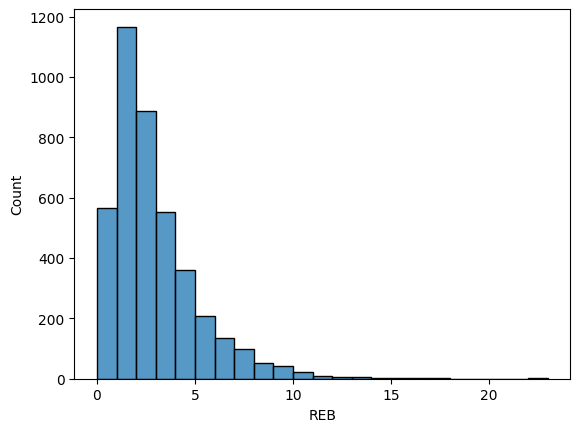

In [30]:
sns.histplot(data = df_join[df_join['ROSTERSTATUS'] == 'Inactive'], x='REB',binwidth=1  )

## 4.2 Correlations between stats and height/weight

<Axes: >

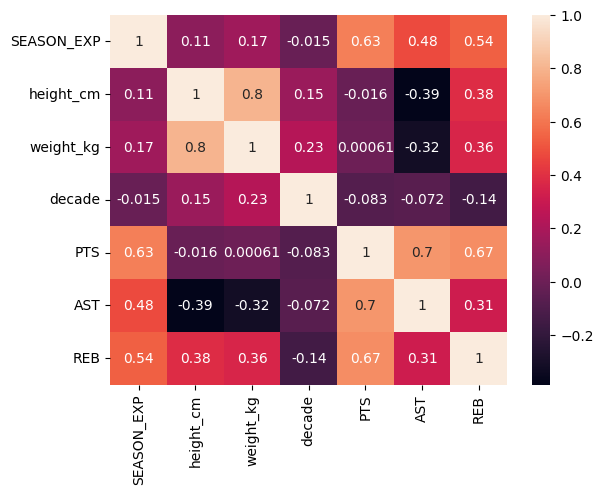

In [31]:

Cols = ['SEASON_EXP', 'height_cm',
       'weight_kg', 'decade', 'PTS', 'AST', 'REB']

sns.heatmap(df_join[Cols].corr(),annot=True)


<Axes: xlabel='AST', ylabel='weight_kg'>

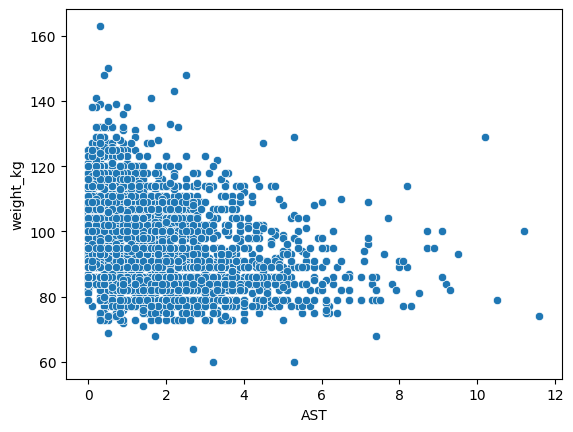

In [32]:
sns.scatterplot(x=df_join['AST'] , y=df_join['weight_kg'])

<Axes: xlabel='REB', ylabel='height_cm'>

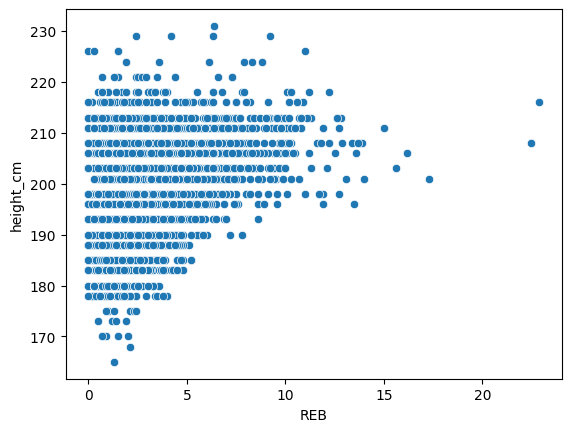

In [33]:
sns.scatterplot(x=df_join['REB'] , y=df_join['height_cm'])

## 4.3 Stats vs decade by positions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='decade', ylabel='PTS'>

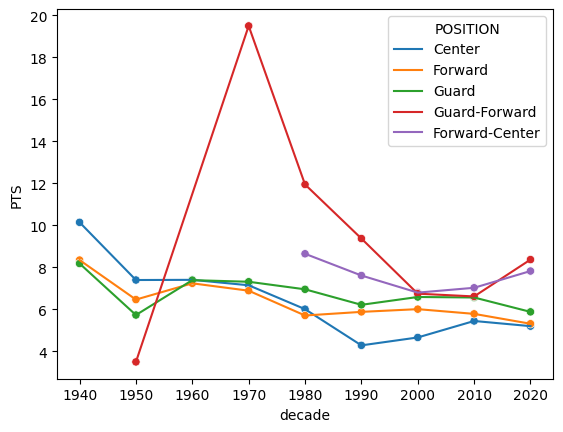

In [34]:
df5 = pd.DataFrame(df_join.groupby(['decade','POSITION'])['PTS'].mean())
sns.lineplot(data=df5,x='decade',y='PTS',hue='POSITION',sizes=5)
sns.scatterplot(data=df5,x='decade',y='PTS',hue='POSITION',sizes=5,legend=False)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='decade', ylabel='AST'>

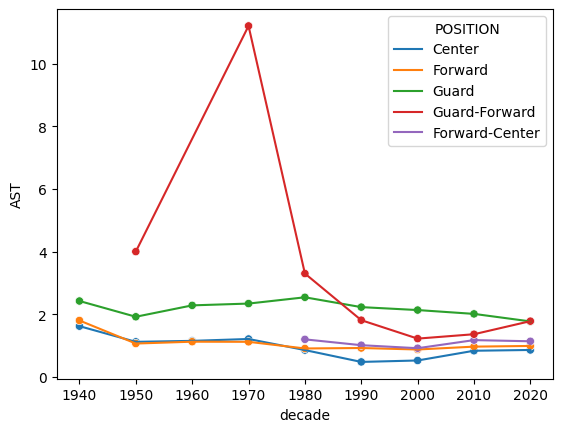

In [35]:
df6 = pd.DataFrame(df_join.groupby(['decade','POSITION'])['AST'].mean())
sns.lineplot(data=df6,x='decade',y='AST',hue='POSITION',sizes=5)
sns.scatterplot(data=df6,x='decade',y='AST',hue='POSITION',sizes=5,legend=False)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='decade', ylabel='REB'>

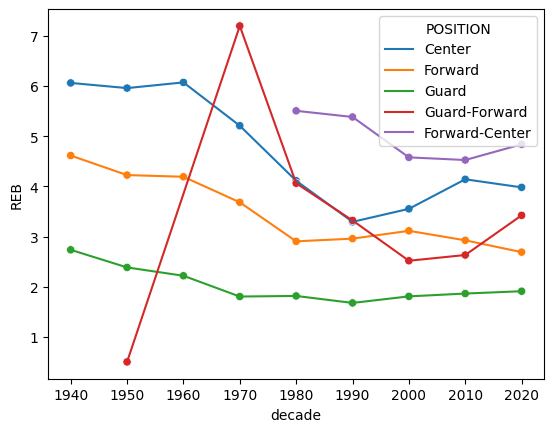

In [36]:
df7 = pd.DataFrame(df_join.groupby(['decade','POSITION'])['REB'].mean())
sns.lineplot(data=df7,x='decade',y='REB',hue='POSITION',sizes=5)
sns.scatterplot(data=df7,x='decade',y='REB',hue='POSITION',sizes=5,legend=False)

In [37]:
df_join[df_join['ROSTERSTATUS'] == 'Inactive'].groupby('POSITION')['REB'].mean()


POSITION
Center            4.217839
Forward           3.246932
Forward-Center    4.481579
Guard             1.810418
Guard-Forward     2.598565
Name: REB, dtype: float64